In [57]:
# buat rr + wr di violin plot untuk setiap tabel & figure
# scatter plot diubah ke violin plot
# bar plot tetap bar plot tapi dikali 2
# tabel di ubah rr + wr jadiin ratio contoh: 10% (7)

In [20]:
#!pip install pandas matplotlib seaborn

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# plt.rc('font', size=12)

In [66]:
# bar plot
"""
barplot = {'Dataset': ['IDK-MRC', 'IDK-MRC', 'TyDI-QA-ID', 'TyDI-QA-ID', 'SQuAD-ID', 'SQuAD-ID'],
        'Model': ['Baseline', 'indonli', 'Baseline', 'indonli', 'Baseline', 'indonli'],
        'F1': [84.25128, 83.4219, 76.47617, 74.66427, 67.07638, 56.91996]}

barplot_df = pd.DataFrame(barplot)
barplot_df
"""

"\nbarplot = {'Dataset': ['IDK-MRC', 'IDK-MRC', 'TyDI-QA-ID', 'TyDI-QA-ID', 'SQuAD-ID', 'SQuAD-ID'],\n        'Model': ['Baseline', 'indonli', 'Baseline', 'indonli', 'Baseline', 'indonli'],\n        'F1': [84.25128, 83.4219, 76.47617, 74.66427, 67.07638, 56.91996]}\n\nbarplot_df = pd.DataFrame(barplot)\nbarplot_df\n"

In [67]:
"""
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Dataset', y='F1', hue='Model', data=barplot_df)

for p in ax.patches:
    height = p.get_height()
    if height != 0.0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.ylabel('F1 Score', fontsize=16)
plt.legend(title='Model', title_fontsize='16')

plt.savefig('bar_plot_for_metric-based.png', dpi=300, bbox_inches='tight')
plt.show()
"""

"\nplt.rcParams.update({'font.size': 16})\n\nplt.figure(figsize=(10, 10))\nax = sns.barplot(x='Dataset', y='F1', hue='Model', data=barplot_df)\n\nfor p in ax.patches:\n    height = p.get_height()\n    if height != 0.0:\n        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),\n                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)\n\nplt.ylabel('F1 Score', fontsize=16)\nplt.legend(title='Model', title_fontsize='16')\n\nplt.savefig('bar_plot_for_metric-based.png', dpi=300, bbox_inches='tight')\nplt.show()\n"

In [26]:
data = pd.read_csv('raw_main_table_metric.csv')
#data.replace('BL', 0, inplace=True)
data = data[data['MSC'] != 'Baseline']
data = data[data['MSC'] != 'indonli']
data = data[data['MSC'] != 'indonli_mnli']

def convert_to_float(value):
    try:
        return float(value.replace(',', '.')) if isinstance(value, str) and value != '#DIV/0!' else float(value)
    except ValueError:
        return 0

data.loc[:, data.columns.difference(['Dataset', 'MSC'])] = data.loc[:, data.columns.difference(['Dataset', 'MSC'])].applymap(convert_to_float)

int_column = ['TQ', 'TS', 'MSI', 'VA', 'RA', 'RR', 'WA', 'WR']
data[int_column] = data[int_column].astype(int)

data

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR,Trade off
13,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,1,0.00,75.82938,84.16834,639,1,201,3,3.000000
14,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.25,75.82938,84.16834,639,1,201,3,3.000000
15,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.50,75.82938,84.16834,639,1,201,3,3.000000
16,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6,6.000000
17,idkmrc,indonli_mnli_idkmrc-nli,1,4,2,1,0.00,61.49289,70.76557,514,126,168,36,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.50,47.76383,67.01314,5657,32,6016,168,5.250000
143,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.75,47.51116,66.82728,5609,80,5833,351,4.387500
144,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.25,47.78068,67.03771,5659,30,6019,165,5.500000
145,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.50,47.78068,67.03771,5659,30,6019,165,5.500000


In [116]:
data['RR Ratio'] = data['RR'] / (data['RA'] + data['RR'] + data['WA'] + data['WR'])
data['WR Ratio'] = data['WR'] / (data['RA'] + data['RR'] + data['WA'] + data['WR'])

In [125]:
data

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR,Trade off,RR Ratio,WR Ratio
13,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,1,0.00,75.82938,84.16834,639,1,201,3,3.000000,0.001185,0.003555
14,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.25,75.82938,84.16834,639,1,201,3,3.000000,0.001185,0.003555
15,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.50,75.82938,84.16834,639,1,201,3,3.000000,0.001185,0.003555
16,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6,6.000000,0.001185,0.007109
17,idkmrc,indonli_mnli_idkmrc-nli,1,4,2,1,0.00,61.49289,70.76557,514,126,168,36,0.285714,0.149289,0.042654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.50,47.76383,67.01314,5657,32,6016,168,5.250000,0.002695,0.014150
143,squadid,indonli_mnli_squadid-nli,2,4,3,2,0.75,47.51116,66.82728,5609,80,5833,351,4.387500,0.006738,0.029563
144,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.25,47.78068,67.03771,5659,30,6019,165,5.500000,0.002527,0.013897
145,squadid,indonli_mnli_squadid-nli,2,4,3,3,0.50,47.78068,67.03771,5659,30,6019,165,5.500000,0.002527,0.013897


In [58]:
"""
plt.figure(figsize=(8, 6))
plt.boxplot([data['TQ'], data['F1']], labels=['TQ', 'F1'])
plt.title('Box Plot TQ vs F1')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()
"""

"\nplt.figure(figsize=(8, 6))\nplt.boxplot([data['TQ'], data['F1']], labels=['TQ', 'F1'])\nplt.title('Box Plot TQ vs F1')\nplt.xlabel('Metrics')\nplt.ylabel('Values')\nplt.show()\n"

In [59]:
"""
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TQ', y='F1', data=data, hue='Dataset', style='MSC', s=100)
plt.title('Scatter Plot TQ vs F1')
plt.xlabel('TQ')
plt.ylabel('F1')
plt.legend(title='Dataset')
plt.show()
"""

"\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x='TQ', y='F1', data=data, hue='Dataset', style='MSC', s=100)\nplt.title('Scatter Plot TQ vs F1')\nplt.xlabel('TQ')\nplt.ylabel('F1')\nplt.legend(title='Dataset')\nplt.show()\n"

In [64]:
"""
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
sns.regplot(x='TQ', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Accepted Label', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([1, 2], ['Entailment Only', 'Entailment or Neutral'])

plt.savefig('regplot_tq_f1.png', dpi=300, bbox_inches='tight')
plt.show()
"""

"\nplt.rcParams.update({'font.size': 16})\n\nplt.figure(figsize=(8, 6))\nsns.regplot(x='TQ', y='F1', data=data, scatter_kws={'s': 100}, ci=None)\nplt.xlabel('Accepted Label', fontsize=16)\nplt.ylabel('F1 Score', fontsize=16)\n\nplt.xticks([1, 2], ['Entailment Only', 'Entailment or Neutral'])\n\nplt.savefig('regplot_tq_f1.png', dpi=300, bbox_inches='tight')\nplt.show()\n"

# Figure 4

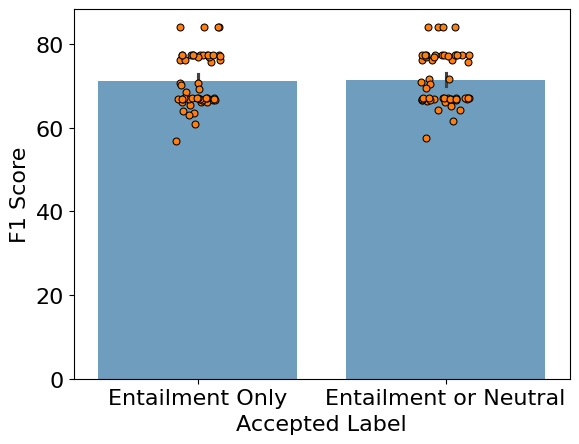

In [60]:
plt.rcParams.update({'font.size': 16})

ax = sns.barplot(
    data=data, 
    x='TQ', 
    y='F1',
    alpha=0.7, 
)

handles, labels = ax.get_legend_handles_labels()

sns.stripplot(
    data=data, 
    x='TQ', 
    y='F1',
    dodge=True, 
    edgecolor="black", 
    linewidth=.75,
    ax=ax,
)

plt.xlabel('Accepted Label', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([0, 1], ['Entailment Only', 'Entailment or Neutral'])

plt.savefig('barplot_with_individual_points_tq_f1.png', dpi=300, bbox_inches='tight')
#plt.show()

In [72]:
"""
# 2 x Bar plot TODO

# Plot
ax = sns.barplot(
    data=data.melt(id_vars=['TQ'], value_vars=['RR', 'WR']),
    x='TQ',
    y='value',
    hue='variable',  # Using 'variable' as hue to separate RR and WR
    alpha=0.7,
)

# Customize bar appearance
handles, labels = ax.get_legend_handles_labels()
sns.stripplot(
    data=data.melt(id_vars=['TQ'], value_vars=['RR', 'WR']),
    x='TQ',
    y='value',
    hue='variable',  # Using 'variable' as hue to separate RR and WR
    dodge=True,
    edgecolor="black",
    linewidth=.75,
    ax=ax,
)

# Set label for x-axis and y-axis
plt.xlabel('Accepted Label', fontsize=16)
plt.ylabel('Score', fontsize=16)

# Customize x-axis ticks
plt.xticks([0, 1], ['Entailment Only', 'Entailment or Neutral'])

# Custom legend
plt.legend(title='Type')

# Save the plot
plt.savefig('double_barplot_with_individual_points_tq_f1.png', dpi=300, bbox_inches='tight')
plt.show()
"""

'\n# 2 x Bar plot TODO\n\n# Plot\nax = sns.barplot(\n    data=data.melt(id_vars=[\'TQ\'], value_vars=[\'RR\', \'WR\']),\n    x=\'TQ\',\n    y=\'value\',\n    hue=\'variable\',  # Using \'variable\' as hue to separate RR and WR\n    alpha=0.7,\n)\n\n# Customize bar appearance\nhandles, labels = ax.get_legend_handles_labels()\nsns.stripplot(\n    data=data.melt(id_vars=[\'TQ\'], value_vars=[\'RR\', \'WR\']),\n    x=\'TQ\',\n    y=\'value\',\n    hue=\'variable\',  # Using \'variable\' as hue to separate RR and WR\n    dodge=True,\n    edgecolor="black",\n    linewidth=.75,\n    ax=ax,\n)\n\n# Set label for x-axis and y-axis\nplt.xlabel(\'Accepted Label\', fontsize=16)\nplt.ylabel(\'Score\', fontsize=16)\n\n# Customize x-axis ticks\nplt.xticks([0, 1], [\'Entailment Only\', \'Entailment or Neutral\'])\n\n# Custom legend\nplt.legend(title=\'Type\')\n\n# Save the plot\nplt.savefig(\'double_barplot_with_individual_points_tq_f1.png\', dpi=300, bbox_inches=\'tight\')\nplt.show()\n'

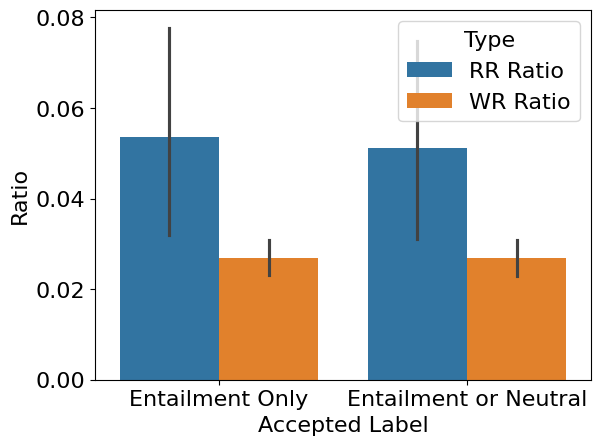

In [128]:
ax = sns.barplot(
    data=data.melt(id_vars=['TQ'], value_vars=['RR Ratio', 'WR Ratio']),
    x='TQ',
    y='value',
    hue='variable'  # Using 'variable' as hue to separate RR and WR
)

# Set label for x-axis and y-axis
plt.xlabel('Accepted Label', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

# Customize x-axis ticks
plt.xticks([0, 1], ['Entailment Only', 'Entailment or Neutral'])

# Custom legend
plt.legend(title='Type')

# Save the plot
plt.savefig('double_barplot_tq_rrwr.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 5

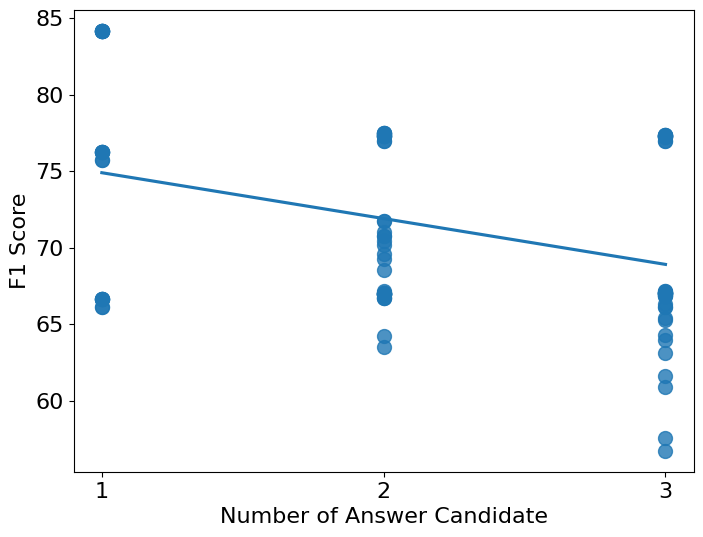

In [74]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
sns.regplot(x='MSI', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Number of Answer Candidate', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([1, 2, 3])

plt.savefig('regplot_msi_f1.png', dpi=300, bbox_inches='tight')
plt.show()

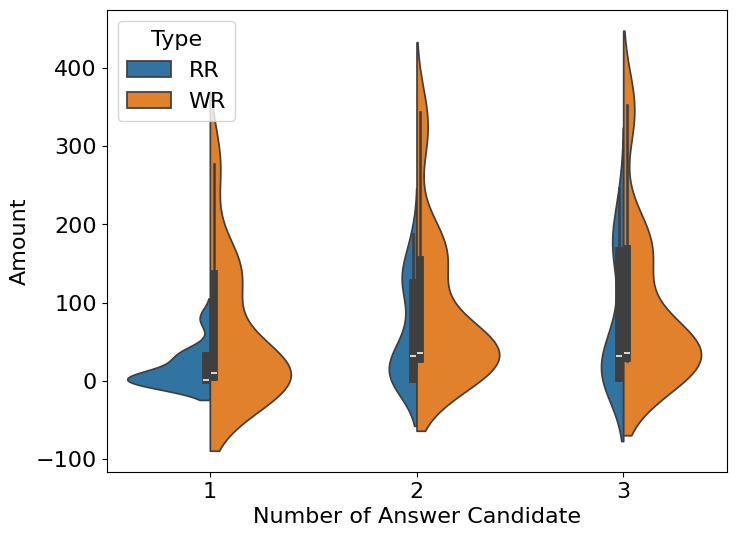

In [133]:
# Violin plot TODO

plt.figure(figsize=(8, 6))
sns.violinplot(x='MSI', y='value', hue='variable', data=data.melt(id_vars=['MSI'], value_vars=['RR', 'WR']), split=True)
plt.xlabel('Number of Answer Candidate', fontsize=16)
plt.ylabel('Amount', fontsize=16)

# Custom legend
plt.legend(title='Type')

plt.xticks([0, 1, 2], [1, 2, 3])

plt.savefig('violinplot_msi_rrwr.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
"""
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
sns.regplot(x='VA', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Final Answer Retrieval Variation', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([1, 2, 3], ['Label Only\n(No answer)', 'Label + Prob\n(No answer)', 'Label + Prob\n(Highest NLI prob)'])

plt.savefig('regplot_va_f1.png', dpi=300, bbox_inches='tight')
plt.show()
"""

"\nplt.rcParams.update({'font.size': 16})\n\nplt.figure(figsize=(8, 6))\nsns.regplot(x='VA', y='F1', data=data, scatter_kws={'s': 100}, ci=None)\nplt.xlabel('Final Answer Retrieval Variation', fontsize=16)\nplt.ylabel('F1 Score', fontsize=16)\n\nplt.xticks([1, 2, 3], ['Label Only\n(No answer)', 'Label + Prob\n(No answer)', 'Label + Prob\n(Highest NLI prob)'])\n\nplt.savefig('regplot_va_f1.png', dpi=300, bbox_inches='tight')\nplt.show()\n"

# Figure 6

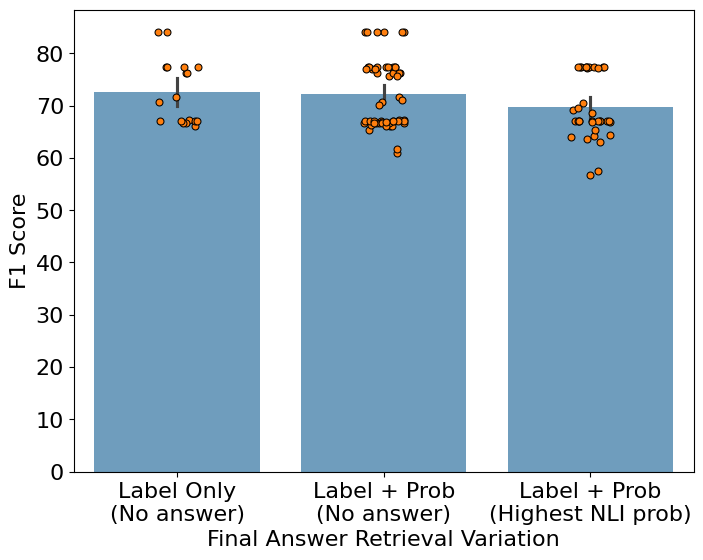

In [77]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8, 6))  # Menyesuaikan lebar subplot

sns.barplot(
    data=data, 
    x='VA', 
    y='F1',
    alpha=0.7, 
    linewidth=1.5,
    ax=ax
)

sns.stripplot(
    data=data, 
    x='VA', 
    y='F1',
    dodge=True, 
    edgecolor="black", 
    linewidth=.75,
    ax=ax
)

plt.xlabel('Final Answer Retrieval Variation', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([0, 1, 2], ['Label Only\n(No answer)', 'Label + Prob\n(No answer)', 'Label + Prob\n(Highest NLI prob)'])

plt.savefig('barplot_with_individual_points_va_f1.png', dpi=300, bbox_inches='tight')
#plt.show()

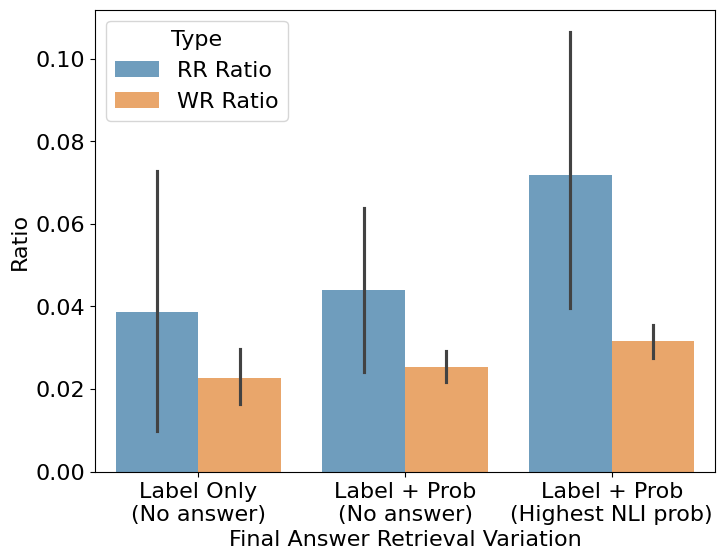

In [134]:
# 2 x Bar plot TODO

fig, ax = plt.subplots(figsize=(8, 6))  # Menyesuaikan lebar subplot

ax = sns.barplot(
    data=data.melt(id_vars=['VA'], value_vars=['RR Ratio', 'WR Ratio']),
    x='VA',
    y='value',
    hue='variable',  # Using 'variable' as hue to separate RR and WR
    linewidth=1.5,
    alpha=0.7,
)

# Set label for x-axis and y-axis
plt.xlabel('Final Answer Retrieval Variation', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

# Customize x-axis ticks
plt.xticks([0, 1, 2], ['Label Only\n(No answer)', 'Label + Prob\n(No answer)', 'Label + Prob\n(Highest NLI prob)'])

# Custom legend
plt.legend(title='Type')

# Save the plot
plt.savefig('double_barplot_va_rrwr.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 7

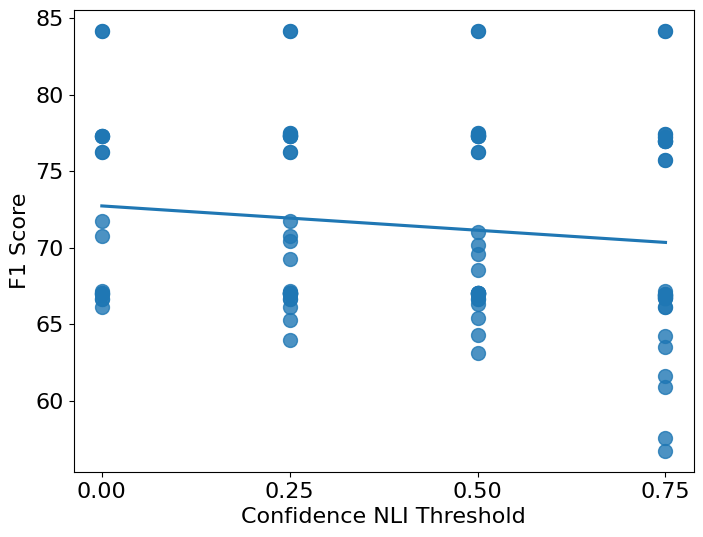

In [95]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
sns.regplot(x='TH', y='F1', data=data, scatter_kws={'s': 100}, ci=None)
plt.xlabel('Confidence NLI Threshold', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([0.0, 0.25, 0.5, 0.75])

plt.savefig('regplot_th_f1.png', dpi=300, bbox_inches='tight')
plt.show()

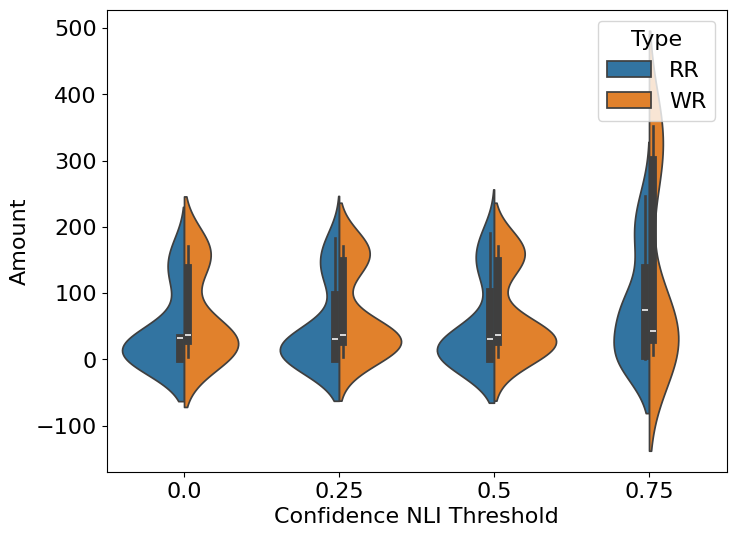

In [135]:
# Violin plot TODO

plt.figure(figsize=(8, 6))
sns.violinplot(x='TH', y='value', hue='variable', data=data.melt(id_vars=['TH'], value_vars=['RR', 'WR']), split=True)
plt.xlabel('Confidence NLI Threshold', fontsize=16)
plt.ylabel('Amount', fontsize=16)

# Custom legend
plt.legend(title='Type')

plt.savefig('violinplot_th_rrwr.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
data_ts = pd.read_csv('ts_experiment.csv')
#data_ts.replace('BL', 0, inplace=True)
data_ts = data_ts[data_ts['MSC'] != 'Baseline']

def convert_to_float(value):
    try:
        return float(value.replace(',', '.')) if isinstance(value, str) and value != '#DIV/0!' else float(value)
    except ValueError:
        return 0

data_ts.loc[:, data_ts.columns.difference(['Dataset', 'MSC'])] = data_ts.loc[:, data_ts.columns.difference(['Dataset', 'MSC'])].applymap(convert_to_float)

int_column = ['TQ', 'TS', 'MSI', 'VA', 'RA', 'RR', 'WA', 'WR']
data_ts[int_column] = data_ts[int_column].astype(int)

data_ts

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR
1,idkmrc,indonli_mnli_idkmrc-nli,1,1,1,2,0.75,71.44550,78.45857,586,54,152,52
2,idkmrc,indonli_mnli_idkmrc-nli,1,2,1,2,0.75,71.68246,78.79067,590,50,155,49
3,idkmrc,indonli_mnli_idkmrc-nli,1,3,1,2,0.75,73.81517,81.11026,611,29,172,32
4,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6
5,idkmrc,indonli_mnli_idkmrc-nli,1,5,1,2,0.75,74.76303,82.35951,620,20,179,25
6,idkmrc,indonli_mnli_idkmrc-nli,1,6,1,2,0.75,65.63981,70.14204,540,100,130,74
7,idkmrc,indonli_mnli_idkmrc-nli,1,7,1,2,0.75,67.06161,72.80594,551,89,136,68
8,idkmrc,indonli_mnli_idkmrc-nli,1,8,1,2,0.75,55.56872,58.81457,449,191,100,104
10,tydiqaid,indonli_mnli_tydiqaid-nli,1,1,2,3,0.50,57.30994,73.35205,483,41,276,55
11,tydiqaid,indonli_mnli_tydiqaid-nli,1,2,2,3,0.50,57.30994,73.27496,483,41,275,56


In [127]:
data_ts['RR Ratio'] = data_ts['RR'] / (data_ts['RA'] + data_ts['RR'] + data_ts['WA'] + data_ts['WR'])
data_ts['WR Ratio'] = data_ts['WR'] / (data_ts['RA'] + data_ts['RR'] + data_ts['WA'] + data_ts['WR'])

data_ts

,Dataset,MSC,TQ,TS,MSI,VA,TH,EM,F1,RA,RR,WA,WR,RR Ratio,WR Ratio
1,idkmrc,indonli_mnli_idkmrc-nli,1,1,1,2,0.75,71.44550,78.45857,586,54,152,52,0.063981,0.061611
2,idkmrc,indonli_mnli_idkmrc-nli,1,2,1,2,0.75,71.68246,78.79067,590,50,155,49,0.059242,0.058057
3,idkmrc,indonli_mnli_idkmrc-nli,1,3,1,2,0.75,73.81517,81.11026,611,29,172,32,0.034360,0.037915
4,idkmrc,indonli_mnli_idkmrc-nli,1,4,1,2,0.75,75.94787,84.16834,639,1,198,6,0.001185,0.007109
5,idkmrc,indonli_mnli_idkmrc-nli,1,5,1,2,0.75,74.76303,82.35951,620,20,179,25,0.023697,0.029621
6,idkmrc,indonli_mnli_idkmrc-nli,1,6,1,2,0.75,65.63981,70.14204,540,100,130,74,0.118483,0.087678
7,idkmrc,indonli_mnli_idkmrc-nli,1,7,1,2,0.75,67.06161,72.80594,551,89,136,68,0.105450,0.080569
8,idkmrc,indonli_mnli_idkmrc-nli,1,8,1,2,0.75,55.56872,58.81457,449,191,100,104,0.226303,0.123223
10,tydiqaid,indonli_mnli_tydiqaid-nli,1,1,2,3,0.50,57.30994,73.35205,483,41,276,55,0.047953,0.064327
11,tydiqaid,indonli_mnli_tydiqaid-nli,1,2,2,3,0.50,57.30994,73.27496,483,41,275,56,0.047953,0.065497


# Figure 8

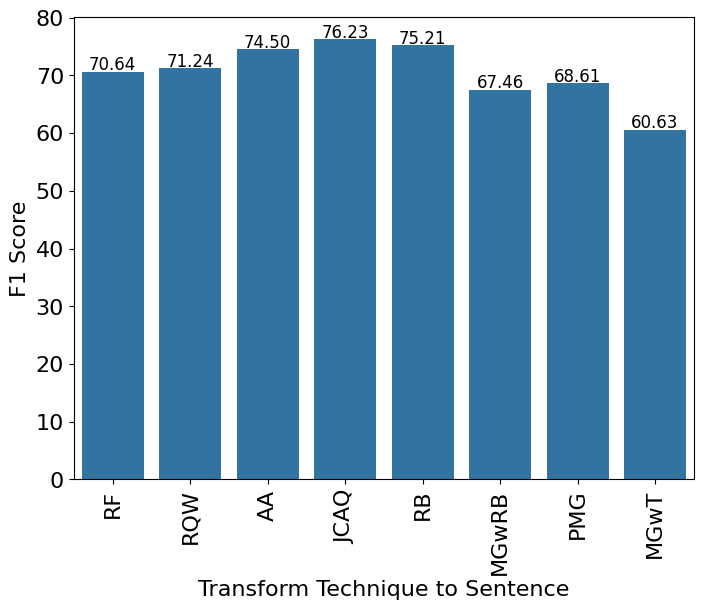

In [37]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='TS', y='F1', data=data_ts, errorbar=None)

for p in ax.patches:
    height = p.get_height()
    if height != 0.0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

plt.xlabel('Transform Technique to Sentence', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['RF', 'RQW', 'AA', 'JCAQ', 'RB', 'MGwRB', 'PMG', 'MGwT'])
plt.xticks(rotation=90)

plt.savefig('barplot_ts_f1.png', dpi=300, bbox_inches='tight')
plt.show()

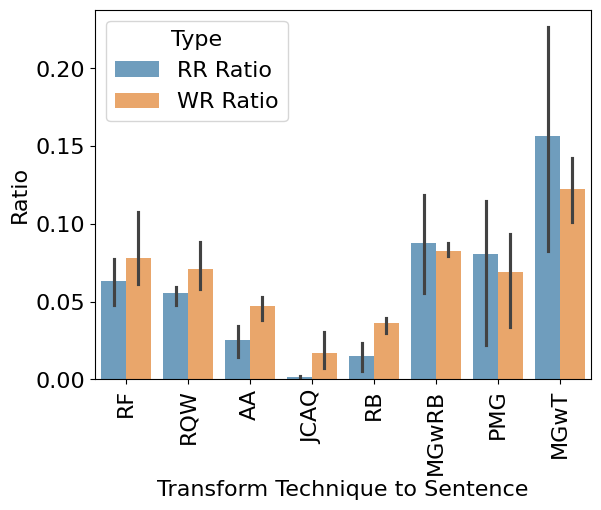

In [136]:
# 2 x Bar plot TODO

ax = sns.barplot(
    data=data_ts.melt(id_vars=['TS'], value_vars=['RR Ratio', 'WR Ratio']),
    x='TS',
    y='value',
    hue='variable',  # Using 'variable' as hue to separate RR and WR
    alpha=0.7,
)

# Set label for x-axis and y-axis
plt.xlabel('Transform Technique to Sentence', fontsize=16)
plt.ylabel('Ratio', fontsize=16)

# Customize x-axis ticks
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['RF', 'RQW', 'AA', 'JCAQ', 'RB', 'MGwRB', 'PMG', 'MGwT'])
plt.xticks(rotation=90)

# Custom legend
plt.legend(title='Type')

# Save the plot
plt.savefig('double_barplot_ts_rrwr.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
"""
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Trade off', data=data, color='blue', label='WR')

plt.xlabel('Dataset')
plt.ylabel('Nilai')
plt.title('Bar Plot WR dan RR berdasarkan Dataset')
plt.legend()

plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Dataset', y='Trade off', data=data, color='blue', label='WR')\n\nplt.xlabel('Dataset')\nplt.ylabel('Nilai')\nplt.title('Bar Plot WR dan RR berdasarkan Dataset')\nplt.legend()\n\nplt.show()\n"